<a href="https://colab.research.google.com/github/DivyaDharshini2293/Machine-learning/blob/main/CODSOFT_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data=pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.shape

(10000, 14)

In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Check for NULL values**

In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Check for Duplicates**

In [ ]:
duplicate=data[data.duplicated()]
duplicate

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


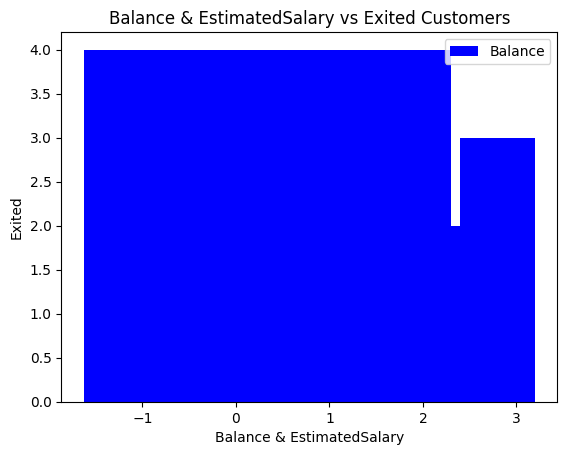

In [ ]:
import matplotlib.pyplot as plt
plt.bar(data['Balance'],data['NumOfProducts'], label="Balance", color='b')
#plt.bar(data['EstimatedSalary'], data['Exited'], label="EstimatedSalary", color='g')
plt.xlabel("Balance & EstimatedSalary")
plt.ylabel("Exited")
plt.title("Balance & EstimatedSalary vs Exited Customers")
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
data['Balance']=sc.fit_transform(data[['Balance']])
print(data['Balance'])

0      -1.225848
1       0.117350
2       1.333053
3      -1.225848
4       0.785728
          ...   
9995   -1.225848
9996   -0.306379
9997   -1.225848
9998   -0.022608
9999    0.859965
Name: Balance, Length: 10000, dtype: float64


In [ ]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
data['EstimatedSalary']=m.fit_transform(data[['EstimatedSalary']])
data['EstimatedSalary']

0       0.506735
1       0.562709
2       0.569654
3       0.469120
4       0.395400
          ...   
9995    0.481341
9996    0.508490
9997    0.210390
9998    0.464429
9999    0.190914
Name: EstimatedSalary, Length: 10000, dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in ['Surname','Geography','Gender']:
  data[i]=le.fit_transform(data[i])
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,-1.225848,1,1,1,0.506735,1
1,2,15647311,1177,608,2,0,41,1,0.117350,1,0,1,0.562709,0
2,3,15619304,2040,502,0,0,42,8,1.333053,3,1,0,0.569654,1
3,4,15701354,289,699,0,0,39,1,-1.225848,2,0,0,0.469120,0
4,5,15737888,1822,850,2,0,43,2,0.785728,1,1,1,0.395400,0


In [ ]:
data=data.drop('RowNumber',axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  int64  
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  int64  
 4   Gender           10000 non-null  int64  
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1015.8 KB


In [ ]:
x=data.drop('Exited',axis=1)
x.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15634602,1115,619,0,0,42,2,-1.225848,1,1,1,0.506735
1,15647311,1177,608,2,0,41,1,0.117350,1,0,1,0.562709
2,15619304,2040,502,0,0,42,8,1.333053,3,1,0,0.569654
3,15701354,289,699,0,0,39,1,-1.225848,2,0,0,0.469120
4,15737888,1822,850,2,0,43,2,0.785728,1,1,1,0.395400


In [ ]:
y=data['Exited']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape

(8000, 12)

In [ ]:
x_test.shape

(2000, 12)

#DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_dt=dt.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy : ",accuracy_score(y_test,y_dt))
print("classification reprt: ")
print(classification_report(y_test,y_dt))
print("confusion matrix: ")
print(confusion_matrix(y_test,y_dt))

Accuracy :  0.786
classification reprt: 
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.46      0.54      0.50       393

    accuracy                           0.79      2000
   macro avg       0.67      0.69      0.68      2000
weighted avg       0.80      0.79      0.79      2000

confusion matrix: 
[[1361  246]
 [ 182  211]]


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_lr=lr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy : ",accuracy_score(y_test,y_lr))
print("classification reprt: ")
print(classification_report(y_test,y_lr))
print("confusion matrix: ")
print(confusion_matrix(y_test,y_lr))

Accuracy :  0.8035
classification reprt: 
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000

confusion matrix: 
[[1607    0]
 [ 393    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_rf=rf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy : ",accuracy_score(y_test,y_rf))
print("classification reprt: ")
print(classification_report(y_test,y_rf))
print("confusion matrix: ")
print(confusion_matrix(y_test,y_rf))

Accuracy :  0.863
classification reprt: 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.45      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

confusion matrix: 
[[1548   59]
 [ 215  178]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)

In [ ]:
y_clf=clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy : ",accuracy_score(y_test,y_clf))
print("classification reprt: ")
print(classification_report(y_test,y_clf))
print("confusion matrix: ")
print(confusion_matrix(y_test,y_clf))

Accuracy :  0.856
classification reprt: 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.69      0.48      0.57       393

    accuracy                           0.86      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.86      0.85      2000

confusion matrix: 
[[1523   84]
 [ 204  189]]
